In [32]:
import math
import numpy as np
import sympy
import scipy
import matplotlib.pyplot   as plt
import seaborn
import sympy.abc

from mpl_toolkits import mplot3d
np.set_printoptions(precision=20, threshold=10, floatmode='fixed')
sympy.interactive.printing.init_printing(use_latex=True)

# Implementation

In [33]:
"Constants and Parameters"

M = 10
X = np.linspace(-2, 2, 50)
T = np.linspace(0, 1, 50)
x,t = np.meshgrid(X, T)

In [34]:
"Closed Form Solutions Known Earlier"

def eval_N_cell(x,t):
    return 0.2 * np.exp(-t) * np.exp(-2 * np.square(x))

def eval_T_cell(x,t):
    return 1 - 0.75 * np.exp(-t) / np.cosh(x)

def eval_U_drug(x,t):
    return np.exp(-t) / np.cosh(x)

def eval_I_cell(x,t):
    return -0.235 * np.exp(-t) / np.square(np.cosh(x)) + 0.375

Ncell = eval_N_cell(x,t)
Tcell = eval_T_cell(x,t)
Icell = eval_I_cell(x,t)
Udrug = eval_U_drug(x,t)

In [38]:
# def __INTERNAL_Q_MAIN__(v):
#     "Differential Op-Mat for SCP"
#     def S(v,i,j):
#         G = scipy.special.gamma
#         numr = lambda k: ((-1)**(i-k) * 2*i* G(i+k) * G(k-v+0.5))
#         denr = lambda k: ((2 if j==0 else 1)*G(k+0.5)*G(i-k+1)*G(k-v-j+1)*G(k-v+j+1))
#         return sum(numr(k)/denr(k) for k in range(math.ceil(v), i+1))
#     return np.array([[S(v,i,j) for j in range(0,M)] for i in range(0,M)])

def __INTERNAL_T_MAIN__(i, var):
    "Shifted Chebyshev Polynomials"
    if (i==0):
        return 1.0
    elif (i==1):
        return sympy.poly(var) * 2.0 - 1.0
    else:
        return __INTERNAL_T_MAIN__(i-1, var) * (2*var-1) * 2.0 - __INTERNAL_T_MAIN__(i-2, var)

def __INTERNAL_F_MAIN__(m, var):
    "Fibonacci Wavelets with k-resolution=1"
    PL = sympy.Poly(FIB(m+1, var),var)
    PX = lambda x: sympy.Poly(PL).eval(x)
    P2 = lambda x: PX(x)**2
    WM = (scipy.integrate.quad(P2, 0, 1)[0])**0.5
    return sympy.Poly(PL/WM, var)

phiCX = np.array([__INTERNAL_T_MAIN__(i, sympy.abc.x) for i in range(M)])
phiCT = np.array([__INTERNAL_T_MAIN__(i, sympy.abc.t) for i in range(M)])
phiFX = np.array([__INTERNAL_F_MAIN__(i, sympy.abc.x) for i in range(M)])
phiFT = np.array([__INTERNAL_F_MAIN__(i, sympy.abc.t) for i in range(M)])

# Results from Approximation

In [36]:
"Coefficients for SCP Approximation"

Ncheb = np.array([
    [ 0.146339, 0.029392, 0.000293722, 0.0000846668, 0.0000108684, -0.0000751112, 0.0000760087, -0.0000707808, 0.000044776, -0.0000101317,],
    [ -0.119411, -0.0243884, 0.000038981, -0.0000578279, -0.0000148559, 0.0000678262, -0.0000664935, 0.0000603142, -0.0000382149, 8.80272e-6,],
    [ -0.00694316, -0.00144335, -0.0000723151, -7.53285e-6, 3.80794e-7, 2.7669e-6, -3.10575e-6, 3.12011e-6, -1.96094e-6, 4.19313e-7,],
    [ 0.0110306, 0.00224165, -0.0000352515, 3.60545e-6, 1.89918e-6, -6.76516e-6, 6.46513e-6, -5.73522e-6, 3.64053e-6, -8.52385e-7,],
    [ -0.0001345, -0.0000263987, 4.08142e-6, 1.88279e-7, -8.48559e-8, 1.39439e-7, -1.15689e-7, 8.90375e-8, -5.73333e-8, 1.49098e-8,],
    [ -0.000414154, -0.0000837974, 2.26596e-6, -7.59846e-8, -8.68839e-8, 2.68262e-7, -2.51912e-7, 2.20012e-7, -1.39865e-7, 3.31282e-8,],
    [ -8.61505e-6, -1.68578e-6, 1.79512e-8, -3.71985e-9, -1.13698e-9, 4.89959e-9, -4.77136e-9, 4.29411e-9, -2.72252e-9, 6.32032e-10,],
    [ 5.65043e-6, 1.15578e-6, -3.72827e-8, 5.69935e-10, 1.33164e-9, -3.80848e-9, 3.53919e-9, -3.06332e-9, 1.94899e-9, -4.64434e-10,],
    [ 3.53152e-7, 7.22364e-8, -2.33017e-9, 3.5621e-11, 8.32275e-11, -2.3803e-10, 2.21199e-10, -1.91457e-10, 1.21812e-10, -2.90271e-11,],
    [ -3.94166e-22, -2.08499e-22, 4.24795e-23, -3.32206e-23, 3.43322e-23, -2.54467e-23, 2.63588e-23, -9.44387e-24, 6.31404e-24, -9.251e-24,],
])

Tcheb = np.array([
    [0.361694,  0.00162664, -0.000512623, 0.000464893, -0.000390751, 0.00013448, -5.68813e-6, -0.0000806315, 0.0000415914, -1.29274e-6,],
    [0.130141,  -0.0056837, 0.0018679, 0.0000127207, -0.000200973, 0.000124243, -0.0000529743, -1.93161e-7, -3.57582e-6, 5.18358e-6,],
    [0.0198414,  -0.00348115, 0.000634473, -0.0000417987, -0.0000428238, 0.0000386562, -0.0000220988, 8.66212e-6, -5.96111e-6, 2.30805e-6,],
    [-0.00641002,  -0.000950117, 0.0000749318, -0.0000224046, 4.34e-6, 3.22932e-6, -4.07523e-6, 4.15759e-6, -2.40523e-6, 4.67364e-7,],
    [-0.000178515,  0.0000478802, -5.89811e-6, -3.56285e-7, 6.0761e-7, -4.10081e-7, 2.14031e-7, -8.34255e-8, 5.99622e-8, -2.31435e-8,],
    [0.000173394,  0.0000454327, -4.17935e-6, 6.89852e-7, 9.82759e-9, -2.20703e-7, 1.98059e-7, -1.66031e-7, 9.91884e-8, -2.23536e-8,],
    [5.12867e-6,  8.5624e-7, -8.78957e-8, 2.50749e-8, -3.89258e-9, -3.56791e-9, 4.15836e-9, -3.95264e-9, 2.31857e-9, -4.813e-10,],
    [-2.03364e-6,  -6.39233e-7, 5.6811e-8, -7.07188e-9, -1.02797e-9, 3.23434e-9, -2.69379e-9, 2.15635e-9, -1.29755e-9, 3.01418e-10,],
    [-1.27102e-7,  -3.9952e-8, 3.55069e-9, -4.41992e-10, -6.42484e-11, 2.02146e-10, -1.68362e-10, 1.34772e-10, -8.10972e-11, 1.88386e-11,],
    [-1.39062e-23,  1.61783e-23, -3.32234e-23, 3.81874e-23, -2.70678e-23, 1.23754e-23, -2.34115e-23, 2.67815e-23, -1.95373e-23, 8.18565e-24,],
])

Icheb = np.array([
    [0.242394, 0.0372091, -0.00542334, 0.000932903, -0.000159157, -0.000117551, 0.000167101, -0.000176987, 0.000116279, -0.0000272269,],
    [0.0374938, -0.0300777, 0.00479958, -0.000652105, -0.000057467, 0.000184014, -0.000157098, 0.000116407, -0.0000787198, 0.0000221237,],
    [0.00421237, -0.00433204, 0.000893891, -0.000141345, -3.34991e-6, 0.0000304687, -0.0000267649, 0.0000197326, -0.0000132775, 3.76091e-6,],
    [-0.002546, 0.00161259, -0.00016376, 0.0000126899, 5.47451e-6, -8.0372e-6, 6.49419e-6, -4.85902e-6, 3.31642e-6, -9.18063e-7,],
    [-0.0000214771, 0.0000473026, -0.000012132, 1.7858e-6, 7.82628e-8, -3.81378e-7, 3.26037e-7, -2.40012e-7, 1.60657e-7, -4.5443e-8,],
    [0.0000818334, -0.0000430947, 2.45582e-6, 3.47558e-8, -1.68854e-7, 1.76633e-7, -1.37885e-7, 1.04208e-7, -7.19468e-8, 1.96567e-8,],
    [2.01758e-6, -1.34515e-6, 1.40278e-7, -9.45713e-9, -5.04776e-9, 6.7819e-9, -5.4076e-9, 4.04976e-9, -2.75918e-9, 7.61198e-10,],
    [-1.04768e-6, 4.90054e-7, -1.40451e-8, -2.6953e-9, 1.96874e-9, -1.73183e-9, 1.32717e-9, -1.01112e-9, 7.06121e-10, -1.91315e-10,],
    [-6.548e-8, 3.06284e-8, -8.77822e-10, -1.68456e-10, 1.23046e-10, -1.08239e-10, 8.29479e-11, -6.31947e-11, 4.41326e-11, -1.19572e-11,],
    [1.96652e-23, -3.25334e-23, -1.06046e-23, 2.28993e-23, -6.53469e-24, 2.6536e-23, -1.53445e-23, 1.55265e-23, -1.18971e-23, -2.11282e-24],
])

Ucheb = np.array([
    [0.517122, -0.174399, -0.00217542, 0.00501459, 0.0404238, -0.0484768, 0.0473529, -0.0251811, 0.00572095, -0.00360374,],
    [-0.117645, 0.0558417, -0.00927117, 0.00129626, -6.58219e-6, -0.000282402, 0.000280851, -0.000233638, 0.00016179, -0.0000445374,],
    [-0.0204731, 0.00970391, -0.00160909, 0.000224768, -1.07209e-6, -0.0000490544, 0.000048772, -0.0000405705, 0.0000280927, -7.73264e-6,],
    [0.00459735, -0.00218951, 0.000364573, -0.0000510836, 2.95799e-7, 0.0000110833, -0.0000110293, 9.17656e-6, -6.35541e-6, 1.74988e-6,],
    [0.000197202, -0.0000940003, 0.0000156648, -2.19639e-6, 1.31917e-8, 4.75956e-7, -4.73725e-7, 3.94166e-7, -2.72998e-7, 7.51711e-8,],
    [-0.000105936, 0.0000504619, -8.4034e-6, 1.17755e-6, -6.84442e-9, -2.5545e-7, 2.5421e-7, -2.11508e-7, 1.46485e-7, -4.0333e-8,],
    [-3.554e-6, 1.70921e-6, -2.86966e-7, 4.04523e-8, -3.14443e-10, -8.67579e-9, 8.64859e-9, -7.19881e-9, 4.98753e-9, -1.37406e-9,],
    [1.15069e-6, -5.4457e-7, 9.01785e-8, -1.2584e-8, 5.58383e-11, 2.75165e-9, -2.73503e-9, 2.27495e-9, -1.57517e-9, 4.33532e-10,],
    [7.19181e-8, -3.40356e-8, 5.63616e-9, -7.86503e-10, 3.48989e-12, 1.71978e-10, -1.70939e-10, 1.42185e-10, -9.84484e-11, 2.70958e-11,],
    [-7.78209e-22, 5.6192e-22, -3.29246e-23, -1.05803e-22, 5.79766e-23, -5.0489e-23, -3.13091e-23, -2.06134e-24, 5.31347e-23, -2.56713e-23,],
])

"Prepare Data Matrices"
NchebData = np.float64(np.vectorize(lambda xx_, tt_: (phiCX @ Ncheb @ phiCT).eval({'x':xx_, 't':tt_}))(x,t))
TchebData = np.float64(np.vectorize(lambda xx_, tt_: (phiCX @ Tcheb @ phiCT).eval({'x':xx_, 't':tt_}))(x,t))
IchebData = np.float64(np.vectorize(lambda xx_, tt_: (phiCX @ Icheb @ phiCT).eval({'x':xx_, 't':tt_}))(x,t))
UchebData = np.float64(np.vectorize(lambda xx_, tt_: (phiCX @ Ucheb @ phiCT).eval({'x':xx_, 't':tt_}))(x,t))

In [39]:
"Coefficients for FIW Approximation"

Nfibo = np.array([
    [63.8216,166.216,-223.882,-447.699,442.253,434.774,-522.942,-97.7471,268.929,-81.726,],
    [8.37169e-6,0.0000136714,-0.0000272125,-0.0000357761,0.0000473373,0.0000323607,-0.0000503021,-4.52633e-6,0.0000238584,-7.75005e-6,],
    [-110.289,-288.847,387.078,778.282,-766.15,-756.637,907.513,170.919,-467.439,141.957,],
    [-0.0000190898,-0.0000311636,0.0000620489,0.0000815489,-0.000107929,-0.0000737589,0.000114681,0.0000103098,-0.0000543902,0.0000176691,],
    [77.2553,203.236,-271.237,-547.762,537.726,532.993,-637.836,-120.855,328.953,-99.8465,],
    [0.0000159824,0.0000260759,-0.0000519441,-0.0000682327,0.0000903419,0.0000617083,-0.0000959829,-8.6162e-6,0.000045518,-0.0000147885,],
    [-27.3913,-72.3207,96.1967,194.962,-190.959,-189.841,226.77,43.1777,-117.075,35.5201,],
    [-6.13214e-6,-9.99899e-6,0.0000199282,0.0000261633,-0.0000346553,-0.0000236591,0.0000368151,3.29989e-6,-0.0000174572,5.67239e-6,],
    [3.8233,10.1238,-13.4308,-27.2965,26.689,26.5943,-31.7225,-6.06313,16.3909,-4.97128,],
    [8.94809e-7,1.45833e-6,-2.90773e-6,-3.81575e-6,5.05604e-6,3.45021e-6,-5.37064e-6,-4.80774e-7,2.54649e-6,-8.27513e-7,],
])

Tfibo = np.array([
    [-60.8691,-173.635,221.246,471.188,-447.067,-463.226,539.291,109.65,-282.252,85.089,],
    [0.0000223484,0.0000213831,-0.000067702,-0.000052628,0.000105661,0.0000403023,-0.0000998655,3.57089e-6,0.0000422564,-0.000015158,],
    [153.95,437.089,-558.631,-1185.77,1127.35,1165.,-1358.5,-275.074,710.354,-214.23,],
    [-0.0000490244,-0.00004334,0.00014735,0.000105337,-0.00022691,-0.0000775583,0.000210985,-0.0000115152,-0.0000876703,0.0000319576,],
    [-61.0132,-194.523,227.884,531.806,-477.096,-531.894,592.913,134.462,-318.52,95.0523,],
    [0.0000386125,0.0000295854,-0.000114569,-0.0000700694,0.0001725,0.0000472454,-0.000155856,0.0000137639,0.000062638,-0.0000235188,],
    [15.0655,51.7738,-57.3749,-142.185,123.112,143.75,-156.059,-37.7469,85.273,-25.296,],
    [-0.0000137616,-8.48252e-6,0.000040159,0.0000191286,-0.0000586592,-0.0000105659,0.000050868,-7.0321e-6,-0.0000194162,7.63275e-6,],
    [-1.64411,-5.94085,6.34453,16.3618,-13.8465,-16.6587,17.7873,4.47838,-9.83037,2.90577,],
    [1.85703e-6,8.31156e-7,-5.31664e-6,-1.69258e-6,7.48655e-6,4.71904e-7,-6.15223e-6,1.27226e-6,2.17757e-6,-9.1589e-7,],
])

Ifibo = np.array([
    [-17.149,-44.8358,60.3545,121.887,-119.643,-117.698,140.912,26.1827,-71.8629,21.7548,],
    [0.0000159544,0.0000225792,-0.0000507433,-0.0000583544,0.0000855493,0.000051149,-0.0000881466,-5.0353e-6,0.000040687,-0.000013559,],
    [62.2413,167.237,-221.24,-453.567,440.582,441.141,-523.428,-100.46,269.638,-81.5521,],
    [-0.0000358269,-0.0000499523,0.000113705,0.000128915,-0.000191094,-0.000112583,0.000196262,0.0000105329,-0.0000903256,0.0000301828,],
    [-33.9841,-99.9783,123.278,272.931,-252.508,-269.252,307.303,65.0375,-161.618,48.4069,],
    [0.0000292853,0.0000398967,-0.0000926416,-0.000102732,0.000154938,0.0000891945,-0.000158335,-7.64719e-6,0.0000725367,-0.000024341,],
    [10.5641,32.5964,-38.7452,-89.2654,80.5645,88.6777,-99.2843,-22.0149,52.7698,-15.7295,],
    [-0.0000109245,-0.0000144755,0.0000344265,0.0000371698,-0.0000572457,-0.000032038,0.000058151,2.43342e-6,-0.0000264927,8.93543e-6,],
    [-1.36988,-4.34281,5.05603,11.9128,-10.604,-11.8797,13.161,2.99284,-7.0367,2.09197,],
    [1.54901e-6,1.99369e-6,-4.86234e-6,-5.10391e-6,8.03724e-6,4.36439e-6,-8.11328e-6,-2.84505e-7,3.6746e-6,-1.24604e-6],
])

Ufibo = np.array([
    [6674.99,35350.3,-29925.4,-98475.2,72549.9,101779.,-98678.3,-29366.7,56018.1,-16033.9,],
    [0.000490388,0.00193192,-0.00196346,-0.00529414,0.00431411,0.00531461,-0.00549122,-0.00141751,0.00296811,-0.000857036,],
    [-1.14649,0.814204,-1.06289,0.419822,-0.181769,0.0468171,-0.00879683,0.00400107,-0.00301036,0.000791058,],
    [-0.00118465,-0.00455695,0.00470746,0.0124785,-0.0102729,-0.0125074,0.0130203,0.0033127,-0.00701947,0.00203196,],
    [0.628386,-0.445636,0.581729,-0.231198,0.100665,-0.0244037,0.0034447,-0.00249724,0.00237467,-0.000648597,],
    [0.00104891,0.00394669,-0.00413946,-0.0108,0.00897674,0.010809,-0.0113324,-0.00284375,0.00609466,-0.00176844,],
    [-0.196757,0.138996,-0.181068,0.072262,-0.0315829,0.00718259,-0.00064065,0.000864468,-0.00095788,0.000267069,],
    [-0.000421228,-0.00155789,0.00165358,0.00426079,-0.00356842,-0.00425936,0.0044908,0.00111457,-0.00241056,0.000700771,],
    [0.0256609,-0.0180222,0.0233887,-0.00935396,0.00409677,-0.000873847,0.0000296205,-0.00012122,0.000149478,-0.000042218,],
    [0.0000636465,0.000232415,-0.000248886,-0.00063539,0.000535157,0.000634615,-0.000671927,-0.000165387,0.000360157,-0.000104848,],
])

"Prepare Data Matrices"
NfiboData = np.float64(np.vectorize(lambda xx_, tt_: (phiFX @ Nfibo @ phiFT).eval({'x':xx_, 't':tt_}))(x,t))
TfiboData = np.float64(np.vectorize(lambda xx_, tt_: (phiFX @ Tfibo @ phiFT).eval({'x':xx_, 't':tt_}))(x,t))
IfiboData = np.float64(np.vectorize(lambda xx_, tt_: (phiFX @ Ifibo @ phiFT).eval({'x':xx_, 't':tt_}))(x,t))
UfiboData = np.float64(np.vectorize(lambda xx_, tt_: (phiFX @ Ufibo @ phiFT).eval({'x':xx_, 't':tt_}))(x,t))

# Error Analysis

In [40]:
print("Errors for Shifted Chebyshev")
print()

print("Ncell vs NchebData")
print("% Mean: ", 100*np.abs(np.mean(Ncell-NchebData)/np.max(Ncell-NchebData)))
print("% SDev: ", 100*np.abs(np.std(Ncell-NchebData)/np.max(Ncell-NchebData)))
print()

print("Tcell vs TchebData")
print("% Mean: ", 100*np.abs(np.mean(Tcell-TchebData)/np.max(Tcell-TchebData)))
print("% SDev: ", 100*np.abs(np.std(Tcell-TchebData)/np.max(Tcell-TchebData)))
print()

print("Icell vs IchebData")
print("% Mean: ", 100*np.abs(np.mean(Icell-IchebData)/np.max(Icell-IchebData)))
print("% SDev: ", 100*np.abs(np.std(Icell-IchebData)/np.max(Icell-IchebData)))
print()

print("Udrug vs UchebData")
print("% Mean: ", 100*np.abs(np.mean(Udrug-UchebData)/np.max(Udrug-UchebData)))
print("% SDev: ", 100*np.abs(np.std(Udrug-UchebData)/np.max(Udrug-UchebData)))
print()

Errors for Shifted Chebyshev

Ncell vs NchebData
% Mean:  96.48803974031786
% SDev:  157.97227365253613

Tcell vs TchebData
% Mean:  42.982554282493936
% SDev:  23.7572793192288

Icell vs IchebData
% Mean:  38.346934685788504
% SDev:  26.237843128225713

Udrug vs UchebData
% Mean:  9.005778259412562
% SDev:  29.739697154845985



In [41]:
print("Errors for Fibonacci Wavelets")
print()

print("Ncell vs NfiboData")
print("% Mean: ", 100*np.abs(np.mean(Ncell-NfiboData)/np.max(Ncell-NfiboData)))
print("% SDev: ", 100*np.abs(np.std(Ncell-NfiboData)/np.max(Ncell-NfiboData)))
print()

print("Tcell vs TfiboData")
print("% Mean: ", 100*np.abs(np.mean(Tcell-TfiboData)/np.max(Tcell-TfiboData)))
print("% SDev: ", 100*np.abs(np.std(Tcell-TfiboData)/np.max(Tcell-TfiboData)))
print()

print("Icell vs IfiboData")
print("% Mean: ", 100*np.abs(np.mean(Icell-IfiboData)/np.max(Icell-IfiboData)))
print("% SDev: ", 100*np.abs(np.std(Icell-IfiboData)/np.max(Icell-IfiboData)))
print()

print("Udrug vs UfiboData")
print("% Mean: ", 100*np.abs(np.mean(Udrug-UfiboData)/np.max(Udrug-UfiboData)))
print("% SDev: ", 100*np.abs(np.std(Udrug-UfiboData)/np.max(Udrug-UfiboData)))
print()

Errors for Fibonacci Wavelets

Ncell vs NfiboData
% Mean:  40.78231042612463
% SDev:  78.39708379445894

Tcell vs TfiboData
% Mean:  39.690919559332585
% SDev:  23.93278177387998

Icell vs IfiboData
% Mean:  34.16250877922859
% SDev:  26.002571739478874

Udrug vs UfiboData
% Mean:  71.54380529780111
% SDev:  15.58923531046724



# Visual Comparison

In [42]:
def plot_all(listy, title):
    # https://stackoverflow.com/a/71428840
    fig,axs = plt.subplots(2,2,figsize=(12,8),subplot_kw={'projection':'3d'})

    # align subplots
    fig.tight_layout(pad=2)
    fig.suptitle(title, x=0.44, y=0.99, fontweight='bold')

    # adjust subplot positions
    fig.subplots_adjust(bottom=0.1, right=0.8, top=1, wspace=0.2, hspace=0)

    i = 0
    for data in listy:
        # axis.set_xticks | axis.set_xlabel
        axs[i//2][i%2].view_init(20, 20)
        axs[i//2][i%2].set_xlabel('X')
        axs[i//2][i%2].set_ylabel('Y')
        # axs[i//2][i%2].set_zlabel(data);
        axs[i//2][i%2].plot_surface(t,x, data, cmap='rocket', edgecolor='none')
        i+=1

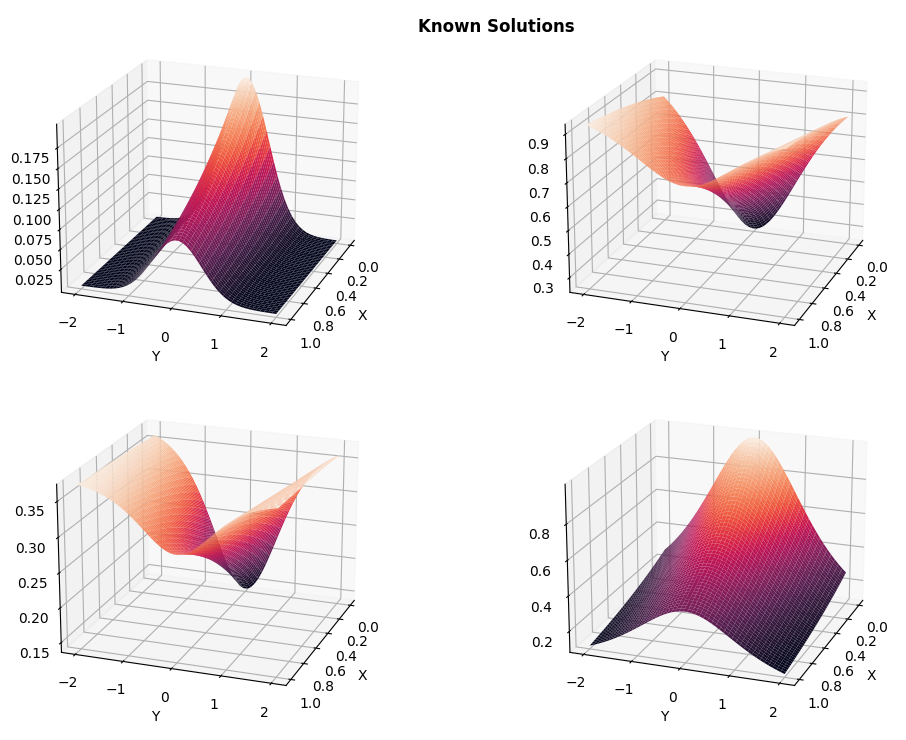

In [43]:
plot_all([Ncell, Tcell, Icell, Udrug], "Known Solutions")

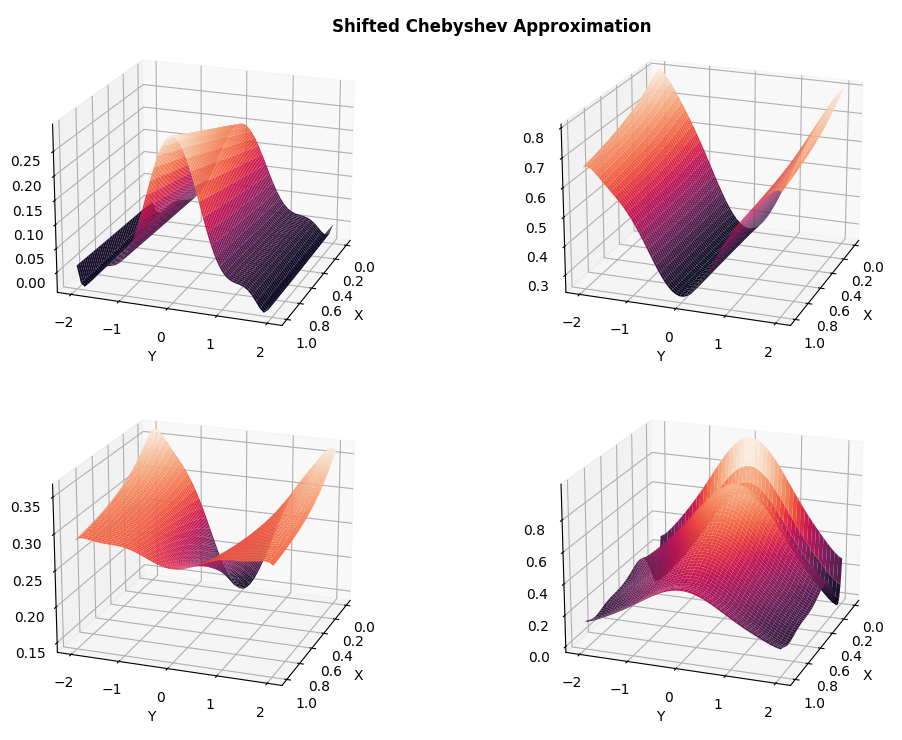

In [44]:
plot_all([NchebData, TchebData, IchebData, UchebData], "Shifted Chebyshev Approximation")

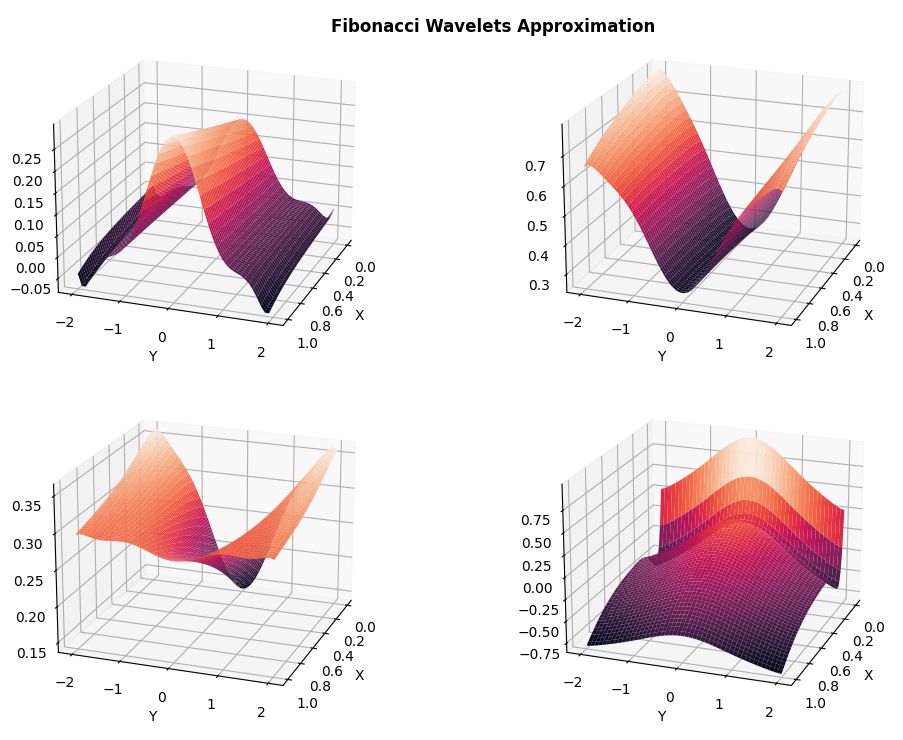

In [45]:
plot_all([NfiboData, TfiboData, IfiboData, UfiboData], "Fibonacci Wavelets Approximation")